In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
#inspector = inspect(engine)
#columns = inspector.get_columns('Measurement')
#for column in columns:
    #print(column["name"], column["type"])

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
print(june)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [16]:
#  3. Convert the June temperatures to a list.
june = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date).all()
june

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [17]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june, columns=['June','June Temps'])
print(df)

            June  June Temps
0     2010-06-01        78.0
1     2010-06-01        74.0
2     2010-06-01        73.0
3     2010-06-01        77.0
4     2010-06-01        69.0
...          ...         ...
1695  2017-06-30        81.0
1696  2017-06-30        74.0
1697  2017-06-30        75.0
1698  2017-06-30        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [18]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [19]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()
print(december)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [21]:
# 7. Convert the December temperatures to a list.
december = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date).all()
december

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [23]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(december, columns=['December','December Temps'])
print(df)

        December  December Temps
0     2010-12-01            76.0
1     2010-12-01            73.0
2     2010-12-01            73.0
3     2010-12-01            72.0
4     2010-12-01            78.0
...          ...             ...
1512  2016-12-31            66.0
1513  2016-12-31            71.0
1514  2016-12-31            72.0
1515  2016-12-31            67.0
1516  2016-12-31            65.0

[1517 rows x 2 columns]


In [24]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3: Additional queries to perform to gather more weather data for June and December

In [35]:
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "06").\
            order_by(Measurement.date).all()
df = pd.DataFrame(june_prcp, columns=['June','June Precipitation'])
print(df)

            June  June Precipitation
0     2010-06-01                0.00
1     2010-06-01                0.03
2     2010-06-01                0.01
3     2010-06-01                0.00
4     2010-06-01                 NaN
...          ...                 ...
1695  2017-06-30                0.00
1696  2017-06-30                0.12
1697  2017-06-30                0.07
1698  2017-06-30                0.01
1699  2017-06-30                0.20

[1700 rows x 2 columns]


In [36]:
df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


     prcp
0    0.00
1    0.01
2    0.00
3    0.00
4    0.00
..    ...
235  0.00
236  0.00
237  0.00
238  0.00
239  0.08

[240 rows x 1 columns]


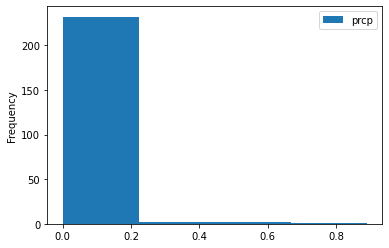

In [37]:
results = session.query(Measurement.prcp).group_by(Measurement.date).\
filter(func.strftime("%m", Measurement.date) == "06").all()
df = pd.DataFrame(results, columns=['prcp'])
df.plot.hist(bins=4)
print(df)

In [27]:
df.describe()

,prcp
count,237.000000
mean,0.023586
std,0.089633
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,0.890000


In [31]:
december_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12").\
            order_by(Measurement.date).all()
df = pd.DataFrame(december_prcp, columns=['December','December Precipitation'])
print(df)

        December  December Precipitation
0     2010-12-01                    0.04
1     2010-12-01                    0.76
2     2010-12-01                    0.03
3     2010-12-01                    0.70
4     2010-12-01                    0.03
...          ...                     ...
1512  2016-12-31                    0.01
1513  2016-12-31                    0.62
1514  2016-12-31                    0.36
1515  2016-12-31                    0.25
1516  2016-12-31                    0.90

[1517 rows x 2 columns]


In [32]:
df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


     prcp
0    0.04
1    0.13
2    0.00
3    0.00
4    0.00
..    ...
212  0.00
213  0.02
214  0.04
215  0.12
216  0.01

[217 rows x 1 columns]


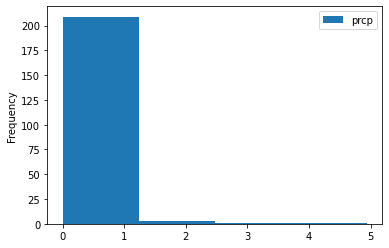

In [33]:
results = session.query(Measurement.prcp).group_by(Measurement.date).\
filter(func.strftime("%m", Measurement.date) == "12").all()
df = pd.DataFrame(results, columns=['prcp'])
df.plot.hist(bins=4)
print(df)